C:\Users\user\AppData\Local\Temp\ipykernel_22740\998788477.py:70: RuntimeWarning: divide by zero encountered in double_scalars
  error_single.append(100/g *1/np.sqrt(I_single))
C:\Users\user\AppData\Local\Temp\ipykernel_22740\998788477.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  error_many.append(100/g * 1/np.sqrt(I_many))


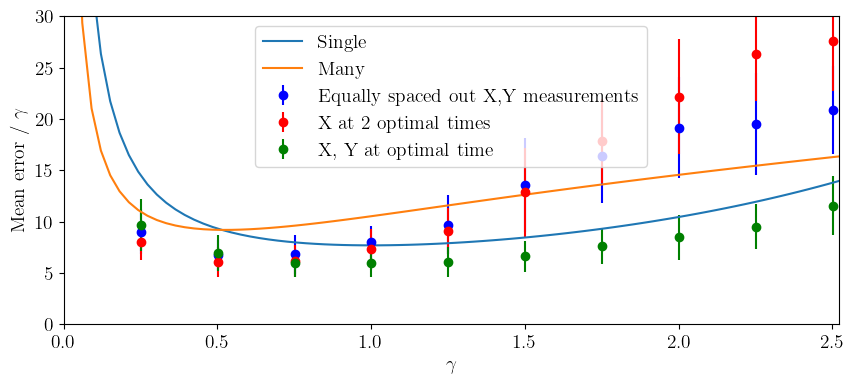

In [5]:
import numpy as np
import pandas as pd


# Load the Excel file
loaded_df = pd.read_excel('C:\\Projects\\Crosstalk\\data_for_paper/stability-Decay.xlsx')

# Assign the columns to variables
shots = loaded_df["shots"].values
Decay = loaded_df["Decay"].values
errors_fisher_median = loaded_df["errors_fisher_median"].values
errors_fisher_std = loaded_df["errors_fisher_std"].values
errors_local_median = loaded_df["errors_local_median"].values
errors_local_std = loaded_df["errors_local_std"].values
errors_uniform_median = loaded_df["errors_uniform_median"].values
errors_uniform_std = loaded_df["errors_uniform_std"].values

#############

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)
# plt.plot(Decay, 100 * np.array(errors_uniform_median ), linestyle='--', marker='o', color='blue', markersize=5,
#          label='X at 20 fixed times')
# plt.plot(Decay, 100 * np.array(errors_fisher_median ), linestyle='--', marker='o', color='red', markersize=5,
#          label='X at 2 non-optimal times')
# plt.plot(Decay, 100 * np.array(errors_local_median ), linestyle='--', marker='o', color='green', markersize=5,
#          label='X, Y at non-optimal time')

plt.errorbar(Decay, 100 * np.array(errors_uniform_median/Decay ), yerr=100 * np.array(errors_uniform_std/Decay),
             fmt='o', color='blue', label='Equally spaced out X,Y measurements')
plt.errorbar(Decay, 100 * np.array(errors_fisher_median/Decay ), yerr=100 * np.array(errors_fisher_std/Decay ),
             fmt='o', color='red', label='X at 2 optimal times')
plt.errorbar(Decay, 100 * np.array(errors_local_median/Decay ), yerr=100 * np.array(errors_local_std/Decay ), fmt='o',
             color='green', label='X, Y at optimal time')

# Scatter points for 75th percentiles

###

N = 10000/8
t_max =np.pi
samples = 20
t = 1

sigma_single = 1/np.sqrt(N)
sigma_many = 1/np.sqrt(N/samples)

Gamma = np.linspace(0, 3, 100)

error_single = []
error_many = []
ratio = []
for g in Gamma:
    I_single = 1/(sigma_single**2) * t**2 * np.exp(-2*t*g)

    T_many = np.linspace(0, t_max, samples)
    I_many = 0
    for i in range(samples):
        I_many += 1/(sigma_many**2) * T_many[i]**2 * np.exp(-2*T_many[i]*g)


    normalization = np.square(g**2 + 1)
    error_single.append(100/g *1/np.sqrt(I_single))
    error_many.append(100/g * 1/np.sqrt(I_many))
    # ratio.append((100 *1/np.sqrt(I_single))/(1/np.sqrt(I_many)))


plt.plot(Gamma, error_single, label='Single')
plt.plot(Gamma, error_many, label='Many')
# plt.plot(T, ratio, label='Ratio single/many')
# plt.plot(T, np.ones(samples), label='1')
# plt.ylim([0,0.2])


###

# plt.title(f'Shots={Decay} ')
plt.xlabel('$\gamma$')
plt.ylabel('Mean error / $\gamma$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
plt.xlim([0, 2.52])
plt.ylim([0, 30])
plt.grid()
plt.legend()

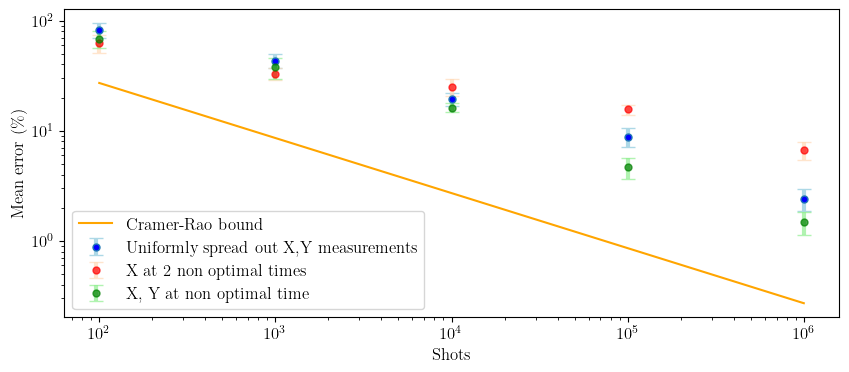

In [6]:
import numpy as np
import pandas as pd
###W = 1, decay = 3 non-opt
###W = 1, decay = 1 opt

# Load the Excel file
loaded_df = pd.read_excel('C:\\Projects\\Crosstalk\\data_for_paper/errors_non_optimal.xlsx')

# Assign the columns to variables
shots = loaded_df["shots"].values
errors_fisher_median = loaded_df["errors_fisher_median"].values
errors_fisher_std = loaded_df["errors_fisher_std"].values
errors_local_median = loaded_df["errors_local_median"].values
errors_local_std = loaded_df["errors_local_std"].values
errors_uniform_median = loaded_df["errors_uniform_median"].values
errors_uniform_std = loaded_df["errors_uniform_std"].values

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}# Adjust the figure size to make the plot longer


# plt.rc('font', **font)


plt.errorbar(shots, 100*np.array(errors_uniform_median), yerr=100*np.array(errors_uniform_std), fmt='o', capsize=5, ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='Uniformly spread out X,Y measurements')

plt.errorbar(shots, 100*np.array(errors_fisher_median), yerr=100*np.array(errors_fisher_std), fmt='o', capsize=5, ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X at 2 non optimal times', alpha=0.7)

plt.errorbar(shots, 100*np.array(errors_local_median), yerr=100*np.array(errors_local_std), fmt='o', capsize=5, ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y at non optimal time', alpha=0.7)

# Shots_2q = [100, 1000, 10000, 100000, 1000000]
# Errors_2q = [50.530481, 18.415648, 7.961954, 6.401243, 6.696693]
# plt.plot(Shots_2q, Errors_2q, linestyle='', marker='o', color='blue', markersize=5, label='2 qubits')
# shots3q=[10000]
# errors3q=[5.809173305]
# plt.plot(shots3q, errors3q, linestyle='', marker='o', color='red', markersize=5, label='More data')
# plt.title(f'Error vs shots W={W} Decay={Decay} ')
# plt.title(f'{n} qubits')
plt.plot(shots, 100*np.e/ np.sqrt(shots), '-', label='Cramer-Rao bound', color = 'orange')
plt.xlabel('Shots')
plt.ylabel('Mean error (\%)')
plt.yscale('log')
plt.xscale('log')
# plt.grid()

plt.rcParams['lines.markersize'] = 10
# Example size for markers
plt.rcParams['font.size'] = 12         # Example size for font

plt.legend()

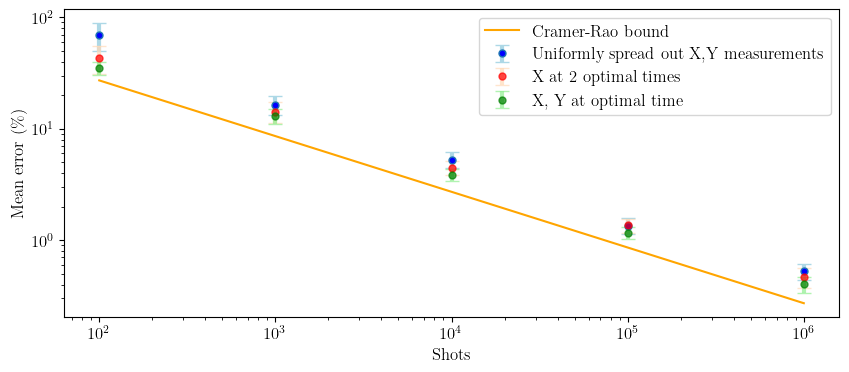

In [8]:
import numpy as np
import pandas as pd
###W = 1, decay = 3 non-opt
###W = 1, decay = 1 opt

# Load the Excel file
loaded_df = pd.read_excel('C:\\Projects\\Crosstalk\\data_for_paper/errors_optimal.xlsx')

# Assign the columns to variables
shots = loaded_df["shots"].values
errors_fisher_median = loaded_df["errors_fisher_median"].values
errors_fisher_std = loaded_df["errors_fisher_std"].values
errors_local_median = loaded_df["errors_local_median"].values
errors_local_std = loaded_df["errors_local_std"].values
errors_uniform_median = loaded_df["errors_uniform_median"].values
errors_uniform_std = loaded_df["errors_uniform_std"].values

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}# Adjust the figure size to make the plot longer


# plt.rc('font', **font)


plt.errorbar(shots, 100*np.array(errors_uniform_median), yerr=100*np.array(errors_uniform_std), fmt='o', capsize=5, ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='Uniformly spread out X,Y measurements')

plt.errorbar(shots, 100*np.array(errors_fisher_median), yerr=100*np.array(errors_fisher_std), fmt='o', capsize=5, ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X at 2 optimal times', alpha=0.7)

plt.errorbar(shots, 100*np.array(errors_local_median), yerr=100*np.array(errors_local_std), fmt='o', capsize=5, ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y at optimal time', alpha=0.7)

# Shots_2q = [100, 1000, 10000, 100000, 1000000]
# Errors_2q = [50.530481, 18.415648, 7.961954, 6.401243, 6.696693]
# plt.plot(Shots_2q, Errors_2q, linestyle='', marker='o', color='blue', markersize=5, label='2 qubits')
# shots3q=[10000]
# errors3q=[5.809173305]
# plt.plot(shots3q, errors3q, linestyle='', marker='o', color='red', markersize=5, label='More data')
# plt.title(f'Error vs shots W={W} Decay={Decay} ')
# plt.title(f'{n} qubits')
plt.plot(shots, 100*np.e/ np.sqrt(shots), '-', label='Cramer-Rao bound', color = 'orange')
plt.xlabel('Shots')
plt.ylabel('Mean error (\%)')
plt.yscale('log')
plt.xscale('log')
# plt.grid()

plt.rcParams['lines.markersize'] = 10
# Example size for markers
plt.rcParams['font.size'] = 12         # Example size for font

plt.legend()